## Project Title: Food_Delivery_TIme_in_mins

In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Objective:
To predict the delivery time for food orders based on various factors such as distance, weather, traffic level, time of day, vehicle type, preparation time, and the courier's experience.

# Context:
In the food delivery industry, delivery time is a crucial factor for both customers and delivery companies. Accurate prediction of delivery time helps in managing customer expectations, optimizing delivery routes, and improving operational efficiency. A reliable prediction model can aid in better planning, resource allocation, and overall performance.

In [2]:
df=pd.read_csv("Food_Delivery_Time.csv")
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


## Features of Data

=>Distance (km): The distance between the restaurant and the delivery location.

=>Weather conditions: The weather on the delivery day (e.g., clear, rainy, foggy, snowy).

=>Traffic Level: The level of traffic during the delivery (e.g., low, medium, high).

=>Time of Day: The time at which the delivery is made (e.g., morning, afternoon, evening, night).

=>Vehicle Type: The type of vehicle used for delivery (e.g., bike, scooter, car).

=>Preparation Time: The time taken to prepare the food at the restaurant.

=>Courier Experience: The experience level of the courier (measured in years).

## Goal of  Project:

The goal of this project is to develop a machine learning model that predicts the delivery time (in minutes) for a given food order based on the above features. 

will handle the various factors that influence delivery time and provide accurate predictions for new orders.

In [3]:
## Target column is Delivery_Time_min
## since it is values are continous will perform regression

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


## Handling null or missing values

In [6]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Time_of_Day"].value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

In [9]:
df["Vehicle_Type"].value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

In [10]:
df["Weather"].value_counts()

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

In [11]:
df["Weather"].fillna(df["Weather"].mode()[0],inplace=True)

In [12]:
df["Traffic_Level"].value_counts()

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

In [13]:
df["Traffic_Level"].fillna(df["Traffic_Level"].mode()[0],inplace=True)

In [14]:
df["Time_of_Day"].value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

In [15]:
df["Time_of_Day"].fillna(df["Time_of_Day"].mode()[0],inplace=True)

In [16]:
df["Courier_Experience_yrs"].value_counts()

Courier_Experience_yrs
6.0    109
9.0    108
1.0    107
8.0    101
2.0     99
4.0     94
7.0     91
0.0     91
5.0     90
3.0     80
Name: count, dtype: int64

In [17]:
df["Courier_Experience_yrs"].fillna(df["Courier_Experience_yrs"].median(),inplace=True)

In [18]:
df.isna().sum()   ###Handled missing or null values successfully

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [19]:
num=df.describe().columns
num

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

## Handling Outliers

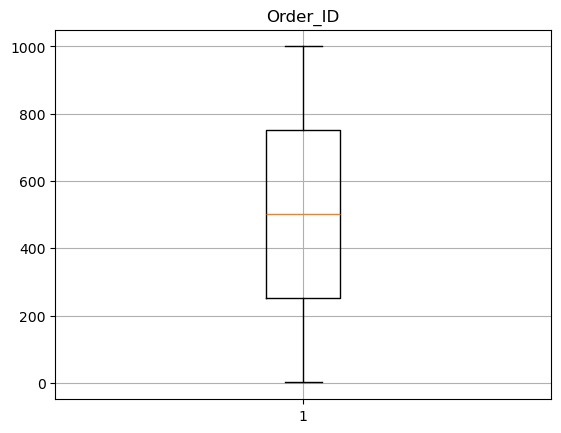

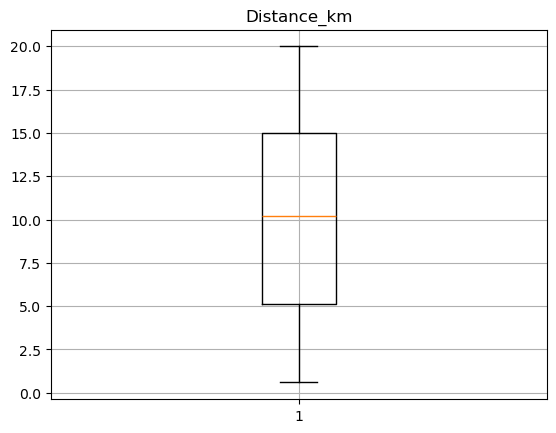

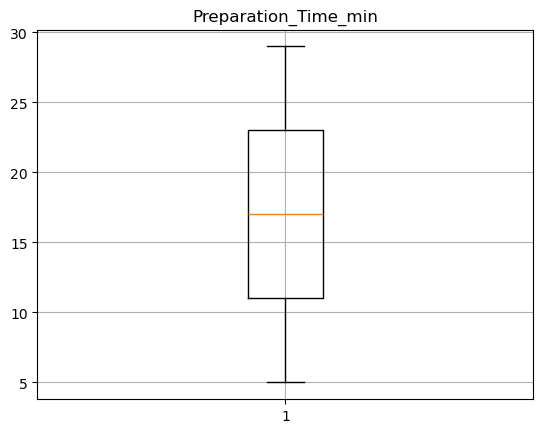

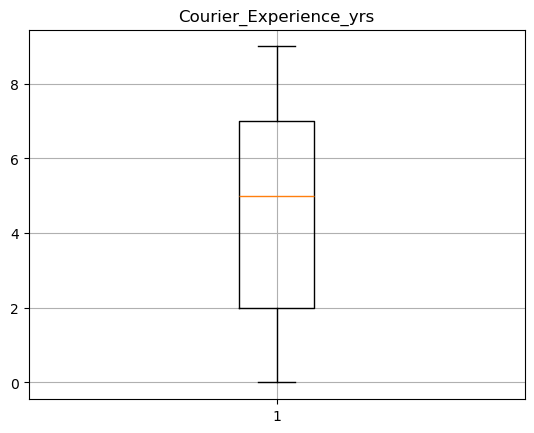

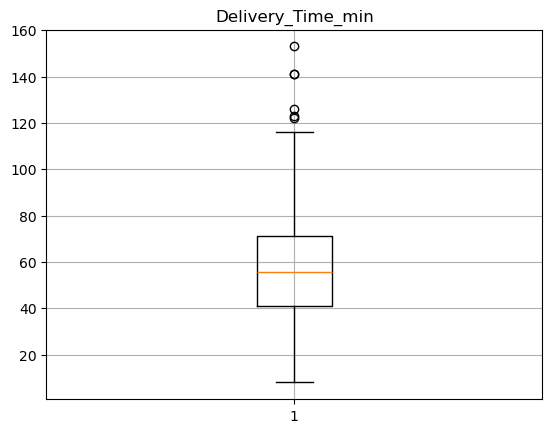

In [20]:
for i in num:
    plt.boxplot(df[i])
    plt.title(i)
    plt.grid(True)
    plt.show()

In [21]:
import seaborn as sns

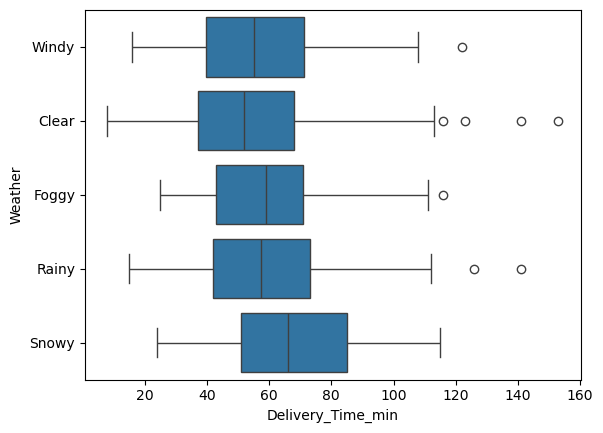

In [22]:
sns.boxplot(data=df,x=df['Delivery_Time_min'],y=df['Weather'])
plt.show()

In [23]:
df[(df['Weather']=='Rainy')& (df['Delivery_Time_min']>112)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
452,394,15.64,Rainy,Low,Morning,Bike,20,4.0,141
784,385,14.83,Rainy,Low,Morning,Car,19,4.0,126


In [24]:
df.loc[(df['Weather']=='Rainy')& (df['Delivery_Time_min']>112),'Delivery_Time_min']=112

In [25]:
df[(df['Weather']=='Rainy')& (df['Delivery_Time_min']>112)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


In [26]:
df[(df['Weather']=='Foggy')& (df['Delivery_Time_min']>111)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
140,45,5.55,Foggy,High,Evening,Bike,18,1.0,116


In [27]:
df.loc[(df['Weather']=='Foggy')& (df['Delivery_Time_min']>111),'Delivery_Time_min']=111

In [28]:
df[(df['Weather']=='Foggy')& (df['Delivery_Time_min']>111)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


In [29]:
df[(df['Weather']=='Clear')& (df['Delivery_Time_min']>112)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,948,18.05,Clear,Medium,Evening,Scooter,10,7.0,123
127,446,18.97,Clear,Low,Evening,Car,25,4.0,141
149,322,14.43,Clear,Medium,Morning,Car,14,4.0,113
379,814,18.46,Clear,Medium,Morning,Scooter,29,1.0,153
550,117,16.17,Clear,Medium,Evening,Car,10,2.0,116


In [30]:
df.loc[(df['Weather']=='Clear')& (df['Delivery_Time_min']>112),'Delivery_Time_min']=112

In [31]:
df[(df['Weather']=='Clear')& (df['Delivery_Time_min']>112)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


In [32]:
df[(df['Weather']=='Windy')& (df['Delivery_Time_min']>109)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
924,428,17.81,Windy,High,Evening,Bike,21,4.0,122


In [33]:
df.loc[(df['Weather']=='Windy')& (df['Delivery_Time_min']>109),'Delivery_Time_min']=109

In [34]:
df[(df['Weather']=='Windy')& (df['Delivery_Time_min']>109)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


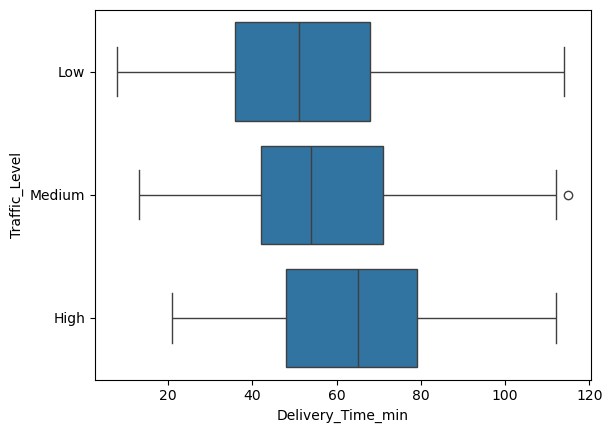

In [35]:
sns.boxplot(data=df,x=df['Delivery_Time_min'],y=df['Traffic_Level'])
plt.show()

In [36]:
df[(df['Traffic_Level']=='Medium')& (df['Delivery_Time_min']>111)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,948,18.05,Clear,Medium,Evening,Scooter,10,7.0,112
149,322,14.43,Clear,Medium,Morning,Car,14,4.0,112
379,814,18.46,Clear,Medium,Morning,Scooter,29,1.0,112
495,179,18.77,Snowy,Medium,Evening,Bike,24,0.0,115
550,117,16.17,Clear,Medium,Evening,Car,10,2.0,112


In [37]:
df.loc[(df['Traffic_Level']=='Medium')& (df['Delivery_Time_min']>111),'Delivery_Time_min']=111

In [38]:
df[(df['Traffic_Level']=='Medium')& (df['Delivery_Time_min']>111)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


In [39]:
df[(df['Traffic_Level']=='Low')& (df['Delivery_Time_min']>112)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
926,367,19.24,Snowy,Low,Morning,Bike,26,1.0,114


In [40]:
df.loc[(df['Traffic_Level']=='Low')& (df['Delivery_Time_min']>112),'Delivery_Time_min']=112

In [41]:
df[(df['Traffic_Level']=='Low')& (df['Delivery_Time_min']>112)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


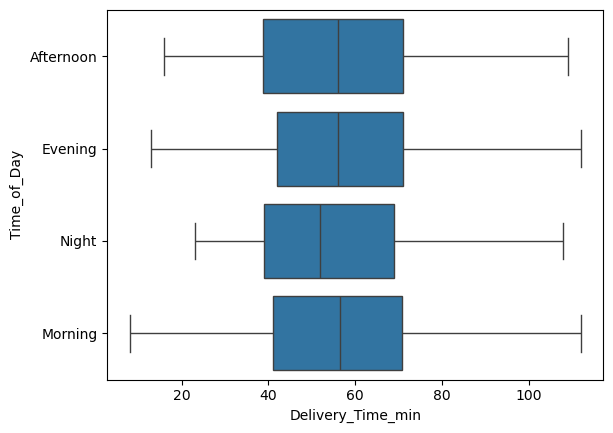

In [42]:
sns.boxplot(data=df,x=df['Delivery_Time_min'],y=df['Time_of_Day'])
plt.show()

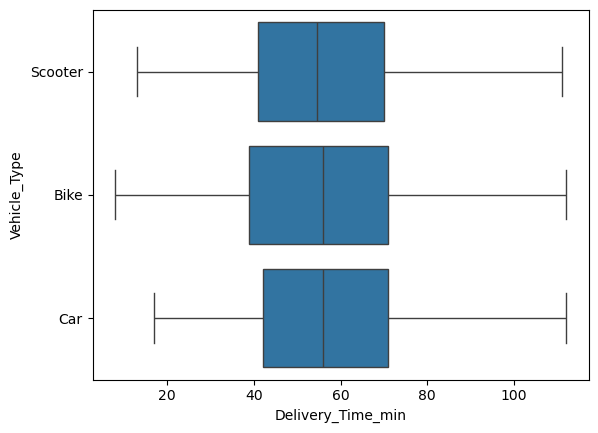

In [43]:
sns.boxplot(data=df,x=df['Delivery_Time_min'],y=df['Vehicle_Type'])
plt.show()

In [44]:
## Handled outliers successfully

## Encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
# Initialize OneHotEncoder
oh_enco= OneHotEncoder(sparse_output=False)  # drop='first' avoids the dummy variable trap (multicollinearity)

In [47]:
# Apply OneHotEncoder to the categorical columns
oh_col= oh_enco.fit_transform(df[['Weather', 'Time_of_Day', 'Vehicle_Type']])

In [48]:
# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(oh_col, columns=oh_enco.get_feature_names_out(['Weather', 'Time_of_Day', 'Vehicle_Type']))

In [49]:
# Concatenate the encoded columns with the original DataFrame (excluding original categorical columns)
df1= pd.concat([df.drop(['Weather', 'Time_of_Day', 'Vehicle_Type'], axis=1), encoded_df], axis=1)

In [50]:
df1

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,Low,12,1.0,43,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,738,16.42,Medium,20,2.0,84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,741,9.52,Low,28,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,661,7.44,Medium,5,1.0,37,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,412,19.03,Low,16,5.0,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,High,13,3.0,54,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,271,16.28,Low,8,9.0,71,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,861,15.62,High,26,2.0,81,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
998,436,14.17,Low,8,0.0,55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
lenco=LabelEncoder()

In [53]:
df1["Traffic_Level"]=lenco.fit_transform(df1["Traffic_Level"])

In [54]:
#Medium    390
#Low       383
#High      197
df1["Traffic_Level"].value_counts()

Traffic_Level
2    420
1    383
0    197
Name: count, dtype: int64

In [55]:
df1

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,1,12,1.0,43,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,738,16.42,2,20,2.0,84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,741,9.52,1,28,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,661,7.44,2,5,1.0,37,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,412,19.03,1,16,5.0,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,0,13,3.0,54,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,271,16.28,1,8,9.0,71,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,861,15.62,0,26,2.0,81,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
998,436,14.17,1,8,0.0,55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
df2=df1.drop("Delivery_Time_min",axis=1)

In [57]:
df2

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,1,12,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,738,16.42,2,20,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,741,9.52,1,28,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,661,7.44,2,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,412,19.03,1,16,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,0,13,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,271,16.28,1,8,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,861,15.62,0,26,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
998,436,14.17,1,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
df3=df1["Delivery_Time_min"]

In [59]:
new_df=pd.concat([df2,df3],axis=1)
new_df

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
0,522,7.93,1,12,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,43
1,738,16.42,2,20,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84
2,741,9.52,1,28,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,59
3,661,7.44,2,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,37
4,412,19.03,1,16,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,0,13,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54
996,271,16.28,1,8,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,71
997,861,15.62,0,26,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,81
998,436,14.17,1,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,55


In [60]:
new_df.corr()

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
Order_ID,1.000000,-0.024483,-0.039492,-0.035100,0.012698,0.015069,-0.034822,0.021826,0.027290,-0.046918,0.058744,-0.053084,-0.029425,0.041556,0.022361,0.042943,-0.061409,-0.038310
Distance_km,-0.024483,1.000000,-0.044290,-0.009037,-0.007534,-0.049656,-0.026329,0.029239,0.072625,-0.001513,-0.002112,-0.015852,0.034545,-0.029308,-0.012405,0.023984,-0.007188,0.789572
Traffic_Level,-0.039492,-0.044290,1.000000,0.000556,-0.037020,0.065058,-0.039177,-0.031275,-0.038720,0.011682,-0.042198,0.025266,0.007371,0.014497,-0.008415,-0.025083,0.030810,-0.105865
Preparation_Time_min,-0.035100,-0.009037,0.000556,1.000000,-0.030842,0.013054,-0.016514,0.016773,0.019119,-0.047268,-0.015979,0.038528,-0.026104,0.007235,-0.018316,0.000529,0.019490,0.308914
Courier_Experience_yrs,0.012698,-0.007534,-0.037020,-0.030842,1.000000,-0.050875,-0.053854,0.071109,0.012452,0.032136,0.033129,0.017260,-0.043534,-0.007897,0.004338,-0.006544,0.000923,-0.087403
Weather_Clear,0.015069,-0.049656,0.065058,0.013054,-0.050875,1.000000,-0.338862,-0.506242,-0.327749,-0.325875,-0.008870,0.006591,0.004228,-0.003586,-0.014000,-0.058051,0.065342,-0.167097
Weather_Foggy,-0.034822,-0.026329,-0.039177,-0.016514,-0.053854,-0.338862,1.000000,-0.171546,-0.111062,-0.110427,-0.001839,-0.015751,-0.012616,0.050078,0.001257,-0.000706,-0.000760,0.044646
Weather_Rainy,0.021826,0.029239,-0.031275,0.016773,0.071109,-0.506242,-0.171546,1.000000,-0.165921,-0.164972,0.011359,0.028505,-0.031225,-0.011924,-0.022891,0.026432,0.002119,0.070591
Weather_Snowy,0.027290,0.072625,-0.038720,0.019119,0.012452,-0.327749,-0.111062,-0.165921,1.000000,-0.106805,-0.011599,0.026570,-0.012757,-0.002968,0.021686,0.051894,-0.068398,0.159156
Weather_Windy,-0.046918,-0.001513,0.011682,-0.047268,0.032136,-0.325875,-0.110427,-0.164972,-0.106805,1.000000,0.013068,-0.060621,0.061371,-0.026291,0.031991,0.010967,-0.044302,-0.018912


In [61]:
new_df.corr().tail(1)

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
Delivery_Time_min,-0.03831,0.789572,-0.105865,0.308914,-0.087403,-0.167097,0.044646,0.070591,0.159156,-0.018912,-0.014421,0.020116,0.005747,-0.019259,-0.004934,0.031222,-0.021569,1.0


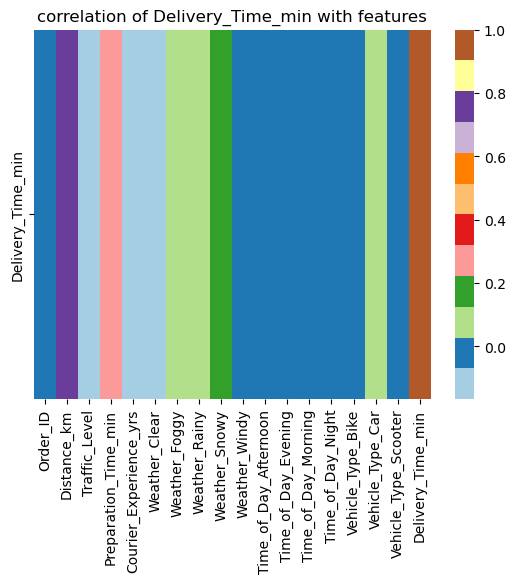

In [62]:
sns.heatmap(new_df.corr().tail(1),cmap="Paired")
plt.title("correlation of Delivery_Time_min with features")
plt.show()

In [63]:
## by observation we can drop Orded_ID as it has no correlation with target column

In [64]:
new_df=new_df.drop("Order_ID",axis=1)

In [65]:
new_df

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
0,7.93,1,12,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,43
1,16.42,2,20,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84
2,9.52,1,28,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,59
3,7.44,2,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,37
4,19.03,1,16,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,0,13,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54
996,16.28,1,8,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,71
997,15.62,0,26,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,81
998,14.17,1,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,55


# scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc=StandardScaler()

In [68]:
new_df["Distance_km"]=sc.fit_transform(new_df[["Distance_km"]])

new_df["Traffic_Level"]=sc.fit_transform(new_df[["Traffic_Level"]])

new_df["Vehicle_Type_Car"]=sc.fit_transform(new_df[["Vehicle_Type_Car"]])
new_df["Vehicle_Type_Scooter"]=sc.fit_transform(new_df[["Vehicle_Type_Scooter"]])
new_df["Vehicle_Type_Bike"]=sc.fit_transform(new_df[["Vehicle_Type_Bike"]])

new_df["Preparation_Time_min"]=sc.fit_transform(new_df[["Preparation_Time_min"]])

new_df["Courier_Experience_yrs	"]=sc.fit_transform(new_df[["Courier_Experience_yrs"]])

new_df["Weather_Clear"]=sc.fit_transform(new_df[["Weather_Clear"]])
new_df["Weather_Foggy"]=sc.fit_transform(new_df[["Weather_Foggy"]])
new_df["Weather_Rainy"]=sc.fit_transform(new_df[["Weather_Rainy"]])
new_df["Weather_Snowy	"]=sc.fit_transform(new_df[["Weather_Snowy"]])
new_df["Weather_Windy	"]=sc.fit_transform(new_df[["Weather_Windy"]])


new_df["Time_of_Day_Afternoon	"]=sc.fit_transform(new_df[["Time_of_Day_Afternoon"]])
new_df["Time_of_Day_Evening"]=sc.fit_transform(new_df[["Time_of_Day_Evening"]])
new_df["Time_of_Day_Morning"]=sc.fit_transform(new_df[["Time_of_Day_Morning"]])
new_df["Time_of_Day_Night"]=sc.fit_transform(new_df[["Time_of_Day_Night"]])                                                                                                                 

In [69]:
new_df.describe()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,...,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min,Courier_Experience_yrs\t,Weather_Snowy\t,Weather_Windy\t,Time_of_Day_Afternoon\t
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.0000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.019807e-17,-1.056932e-16,8.526513e-17,4.592000,0.0000,4.263256e-17,6.039613e-17,0.097000,0.096000,0.284000,...,-7.105427e-17,-8.526513e-17,-6.039613e-17,-7.105427e-18,-7.105427e-18,56.575000,9.947598e-17,1.065814e-17,-2.842171e-17,5.240253e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,2.871198,1.0005,1.000500e+00,1.000500e+00,0.296106,0.294739,0.451162,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,21.585048,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.663205e+00,-1.623795e+00,-1.663947e+00,0.000000,-1.0000,-3.388616e-01,-5.062424e-01,0.000000,0.000000,0.000000,...,-7.145446e-01,-3.047887e-01,-1.006018e+00,-4.921748e-01,-6.577726e-01,8.000000,-1.600132e+00,-3.277495e-01,-3.258753e-01,-6.298000e-01
25%,-8.702386e-01,-2.960803e-01,-8.307238e-01,2.000000,-1.0000,-3.388616e-01,-5.062424e-01,0.000000,0.000000,0.000000,...,-7.145446e-01,-3.047887e-01,-1.006018e+00,-4.921748e-01,-6.577726e-01,41.000000,-9.032107e-01,-3.277495e-01,-3.258753e-01,-6.298000e-01
50%,2.283710e-02,-2.960803e-01,2.499670e-03,5.000000,0.0000,-3.388616e-01,-5.062424e-01,0.000000,0.000000,0.000000,...,-7.145446e-01,-3.047887e-01,9.940179e-01,-4.921748e-01,-6.577726e-01,55.500000,1.421721e-01,-3.277495e-01,-3.258753e-01,-6.298000e-01
75%,8.706882e-01,1.031634e+00,8.357231e-01,7.000000,1.0000,-3.388616e-01,-5.062424e-01,0.000000,0.000000,1.000000,...,1.399493e+00,-3.047887e-01,9.940179e-01,-4.921748e-01,1.520282e+00,71.000000,8.390939e-01,-3.277495e-01,-3.258753e-01,1.587806e+00
max,1.744006e+00,1.031634e+00,1.668947e+00,9.000000,1.0000,2.951057e+00,1.975338e+00,1.000000,1.000000,1.000000,...,1.399493e+00,3.280961e+00,9.940179e-01,2.031798e+00,1.520282e+00,112.000000,1.536016e+00,3.051111e+00,3.068659e+00,1.587806e+00


In [70]:
x=new_df.drop("Delivery_Time_min",axis=1)
x

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Courier_Experience_yrs\t,Weather_Snowy\t,Weather_Windy\t,Time_of_Day_Afternoon\t
0,-0.374085,-0.296080,-0.691853,1.0,-1.0,-0.338862,-0.506242,0.0,1.0,1.0,-0.643760,-0.714545,-0.304789,-1.006018,-0.492175,1.520282,-1.251672,-0.327749,3.068659,1.587806
1,1.117008,1.031634,0.419111,2.0,1.0,-0.338862,-0.506242,0.0,0.0,0.0,1.553374,-0.714545,-0.304789,0.994018,-0.492175,-0.657773,-0.903211,-0.327749,-0.325875,-0.629800
2,-0.094835,-0.296080,1.530076,1.0,-1.0,2.951057,-0.506242,0.0,0.0,0.0,-0.643760,-0.714545,3.280961,-1.006018,-0.492175,1.520282,-1.251672,-0.327749,-0.325875,-0.629800
3,-0.460144,1.031634,-1.663947,1.0,-1.0,-0.338862,1.975338,0.0,0.0,1.0,-0.643760,-0.714545,-0.304789,-1.006018,-0.492175,1.520282,-1.251672,-0.327749,-0.325875,1.587806
4,1.575401,-0.296080,-0.136371,5.0,1.0,-0.338862,-0.506242,0.0,0.0,0.0,-0.643760,1.399493,-0.304789,0.994018,-0.492175,-0.657773,0.142172,-0.327749,-0.325875,-0.629800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.273977,-1.623795,-0.552983,3.0,1.0,-0.338862,-0.506242,0.0,0.0,0.0,1.553374,-0.714545,-0.304789,-1.006018,2.031798,-0.657773,-0.554750,-0.327749,-0.325875,-0.629800
996,1.092420,-0.296080,-1.247335,9.0,-1.0,-0.338862,1.975338,0.0,0.0,0.0,-0.643760,1.399493,-0.304789,-1.006018,-0.492175,1.520282,1.536016,-0.327749,-0.325875,-0.629800
997,0.976505,-1.623795,1.252335,2.0,-1.0,-0.338862,-0.506242,1.0,0.0,0.0,1.553374,-0.714545,-0.304789,-1.006018,-0.492175,1.520282,-0.903211,3.051111,-0.325875,-0.629800
998,0.721842,-0.296080,-1.247335,0.0,1.0,-0.338862,-0.506242,0.0,0.0,1.0,-0.643760,-0.714545,-0.304789,0.994018,-0.492175,-0.657773,-1.600132,-0.327749,-0.325875,1.587806


In [71]:
y=new_df["Delivery_Time_min"]
y

0      43
1      84
2      59
3      37
4      68
       ..
995    54
996    71
997    81
998    55
999    58
Name: Delivery_Time_min, Length: 1000, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [74]:
len(x_train)  ## 70% Data

700

In [75]:
len(x_test)    ## 30% Data

300

## 1. Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr=LinearRegression()

In [78]:
model=lr.fit(x_train,y_train)
model

LinearRegression()

In [79]:
y_pred_test=model.predict(x_test)

In [80]:
residual=y_test-y_pred_test
residual

25      2.003633
464   -20.053839
372     3.914986
730     3.145664
757     0.899031
         ...    
307     0.018869
22      0.223450
620    -4.012655
965     1.390471
961     1.623757
Name: Delivery_Time_min, Length: 300, dtype: float64

In [81]:
model.intercept_


59.405282404267794

In [82]:
model.coef_

array([16.83744456, -1.57737748,  6.74932382, -0.53420993, -2.00255838,
        1.4312409 ,  0.67497503,  0.396192  , -0.10194519, -0.08249478,
        0.42465763, -0.3652969 ,  0.22236176, -0.07847934,  0.0435785 ,
        0.04785869, -0.18615128,  1.33867749, -0.34605641, -0.18294088])

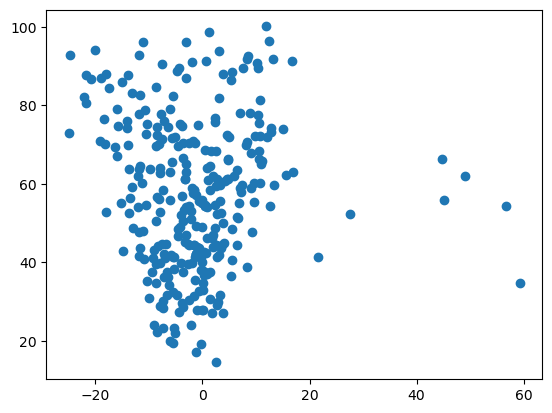

In [83]:
plt.scatter(residual,y_pred_test)

In [84]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score

In [85]:
# for training dataset
y_pred_train=model.predict(x_train)

mse= mean_squared_error(y_train, y_pred_train) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)


Mean Sqaured Error : 112.45262263605076
Root Mean Sqaured Error : 10.604368092255699
Mean Absolute Error : 7.222084466966784
R Squared Value : 0.7576590014009325
Adjusted R Squared Value : 0.7505208276572192


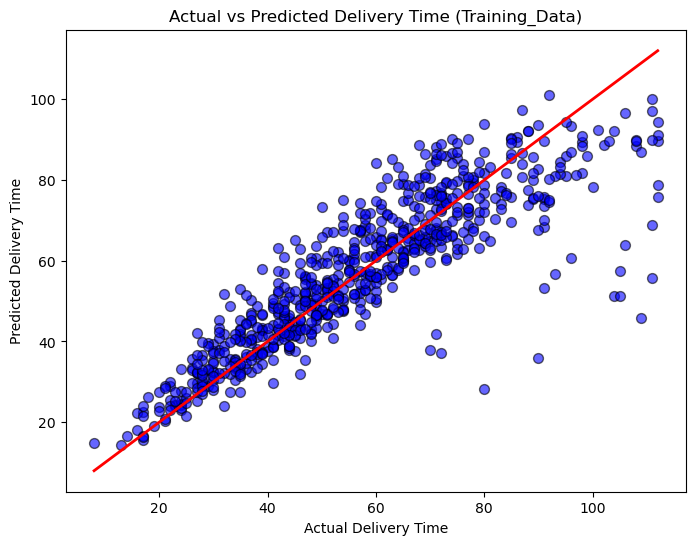

In [86]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

In [87]:
# for testing dataset
y_pred_test=model.predict(x_test)

mse= mean_squared_error(y_test, y_pred_test) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred_test) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred_test) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 118.19784002602816
Root Mean Sqaured Error : 10.871883002775009
Mean Absolute Error : 7.541561134064744
R Squared Value : 0.7476164621999389
Adjusted R Squared Value : 0.7295244523217983


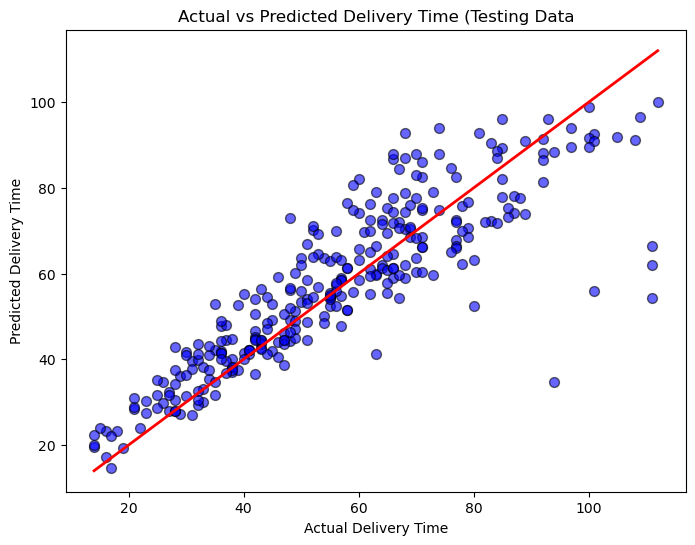

In [88]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

In [89]:
from sklearn.linear_model import Ridge

In [90]:
l2=Ridge(alpha=0.01)

In [91]:
l2.fit(x_train,y_train)

Ridge(alpha=0.01)

Mean Sqaured Error : 112.45262270558422
Root Mean Sqaured Error : 10.604368095534227
Mean Absolute Error : 7.222090965620364
R Squared Value : 0.7576590012510844
Adjusted R Squared Value : 0.7505208275029573


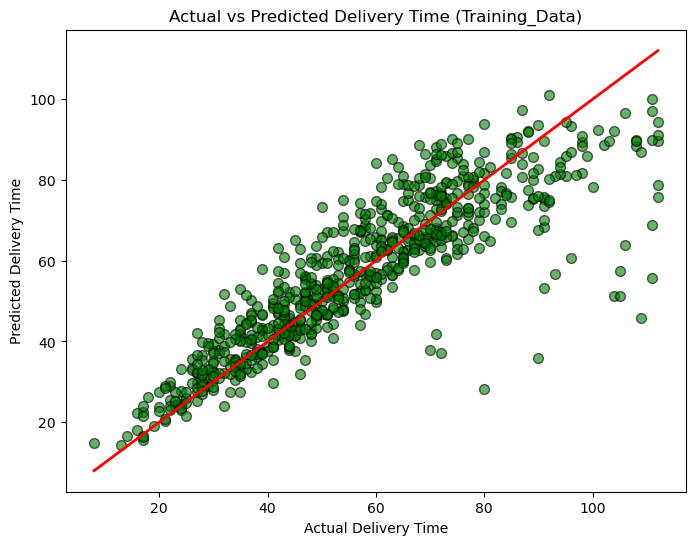

In [92]:
# for training dataset
y_pred_train=l2.predict(x_train)

mse= mean_squared_error(y_train, y_pred_train) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()


Mean Sqaured Error : 118.19764452030918
Root Mean Sqaured Error : 10.871874011425499
Mean Absolute Error : 7.541584821945283
R Squared Value : 0.7476168796561716
Adjusted R Squared Value : 0.7295248997032091


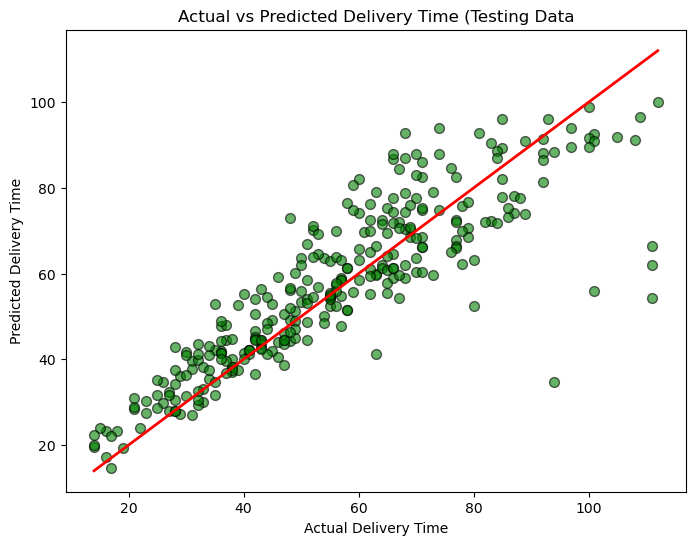

In [93]:
# for testing dataset
y_pred_test=l2.predict(x_test)

mse= mean_squared_error(y_test, y_pred_test) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred_test) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred_test) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

In [94]:
l2.score(x_train,y_train)

0.7576590012510844

In [95]:
l2.score(x_test,y_test)

0.7476168796561716

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
hyperparametre={'alpha':[0.0001,0.001,0.01,1,2,0.2,0.002,0.0002]
               }
gs_cv_dc1=GridSearchCV(l2,hyperparametre,cv=5)

In [98]:
gs_cv_dc1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 2, 0.2, 0.002,
                                   0.0002]})

Mean Sqaured Error : 112.45262270558422
Root Mean Sqaured Error : 10.604368095534227
Mean Absolute Error : 7.222090965620364
R Squared Value : 0.7576590012510844
Adjusted R Squared Value : 0.7505208275029573


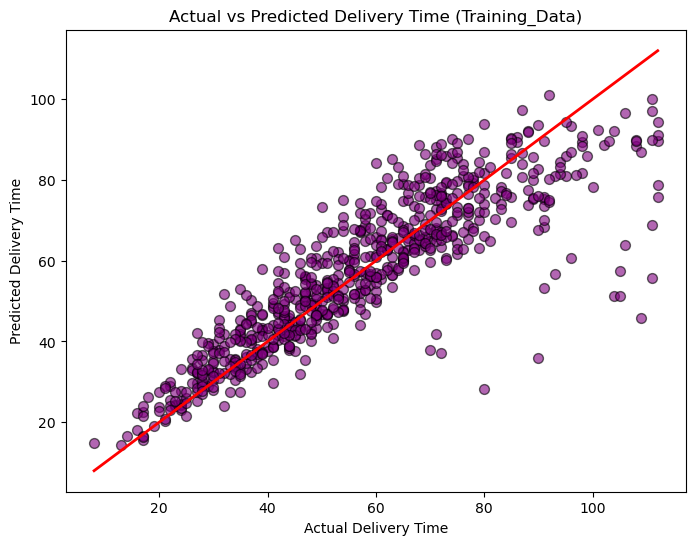

In [99]:
# for training dataset
y_pred_train=gs_cv_dc1.predict(x_train)

mse= mean_squared_error(y_train, y_pred_train) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='purple', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()


Mean Sqaured Error : 118.19764452030918
Root Mean Sqaured Error : 10.871874011425499
Mean Absolute Error : 7.541584821945283
R Squared Value : 0.7476168796561716
Adjusted R Squared Value : 0.7295248997032091


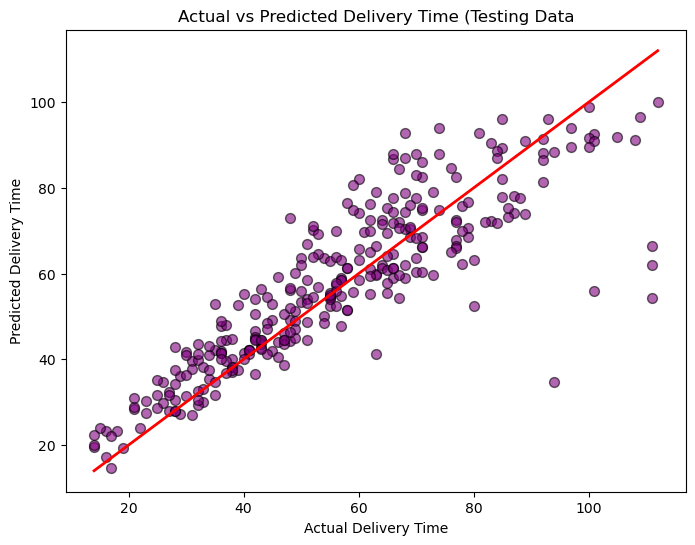

In [100]:
# for testing dataset
y_pred_test=gs_cv_dc1.predict(x_test)

mse= mean_squared_error(y_test, y_pred_test) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred_test) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred_test) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='purple', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

In [101]:
gs_cv_dc1.best_estimator_

Ridge(alpha=0.01)

In [102]:
l2_new=Ridge(alpha=0.01)

In [103]:
l2_new.fit(x_train,y_train)

Ridge(alpha=0.01)

Mean Sqaured Error : 112.45262270558422
Root Mean Sqaured Error : 10.604368095534227
Mean Absolute Error : 7.222090965620364
R Squared Value : 0.7576590012510844
Adjusted R Squared Value : 0.7505208275029573


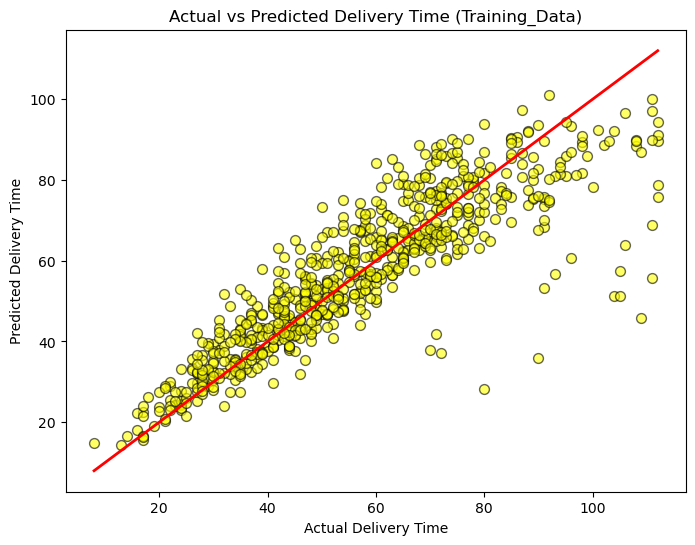

In [104]:
# for training dataset
y_pred_train=l2_new.predict(x_train)

mse= mean_squared_error(y_train, y_pred_train) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='yellow', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()


Mean Sqaured Error : 118.19764452030918
Root Mean Sqaured Error : 10.871874011425499
Mean Absolute Error : 7.541584821945283
R Squared Value : 0.7476168796561716
Adjusted R Squared Value : 0.7295248997032091


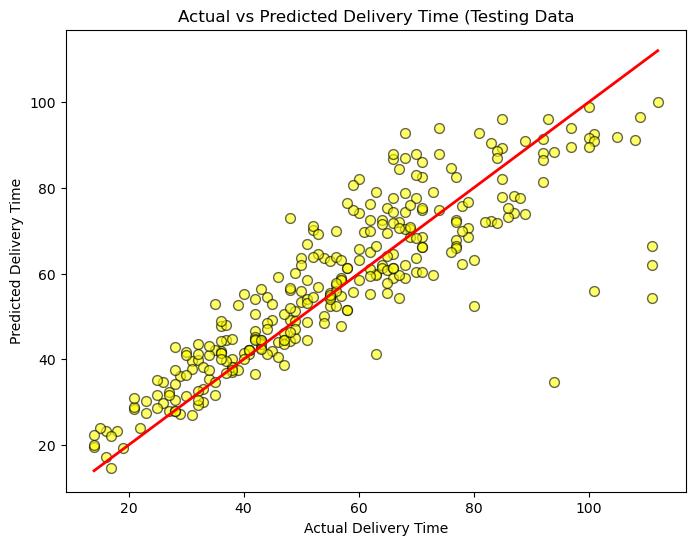

In [105]:
# for testing dataset
y_pred_test=l2_new.predict(x_test)

mse= mean_squared_error(y_test, y_pred_test) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred_test) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred_test) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='yellow', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

In [106]:
l2_new.score(x_test,y_test)

0.7476168796561716

In [107]:
l2_new.score(x_train,y_train)

0.7576590012510844

## as there is heteroscadasticity that means the variance of errors is not constant across observations. 
## in this case we can use WLS 

In [108]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [109]:
# Add a constant (intercept) to the features
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [110]:
# To deal with heteroscedasticity, we need to compute weights.
# A simple approach is to assume weights are inversely proportional to the residual variance.
# we can use the residuals from an initial OLS regression to compute these weights.

In [111]:
# Step 1: Fit an initial OLS model to get the residuals and calculate weights for training data
ols_model_train = sm.OLS(y_train, x_train).fit()

In [112]:
# Compute absolute residuals from the OLS fit on training data
residuals_train = np.abs(ols_model_train.resid)

In [113]:
# Assign weights as the inverse of the absolute residuals (or use another method to calculate weights)
weights_train = 1 / residuals_train

In [114]:
# Replace infinite weights with a small value to avoid division by zero
weights_train = np.where(weights_train == np.inf, 1e10, weights_train)

In [115]:
# Step 2: Fit the WLS model using the weights from the training data
wls_model = sm.WLS(y_train, x_train, weights=weights_train).fit()

In [116]:
# Print the WLS model summary
print("WLS Model Summary (Training Data):")
print(wls_model.summary())

WLS Model Summary (Training Data):
                            WLS Regression Results                            
Dep. Variable:      Delivery_Time_min   R-squared:                       0.964
Model:                            WLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1407.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:53:57   Log-Likelihood:                -2195.8
No. Observations:                 700   AIC:                             4420.
Df Residuals:                     686   BIC:                             4483.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Mean Sqaured Error : 112.45262263605076
Root Mean Sqaured Error : 10.604368092255699
Mean Absolute Error : 7.2220844669667885
R Squared Value : 0.7576590014009325
Adjusted R Squared Value : 0.7501528642761826


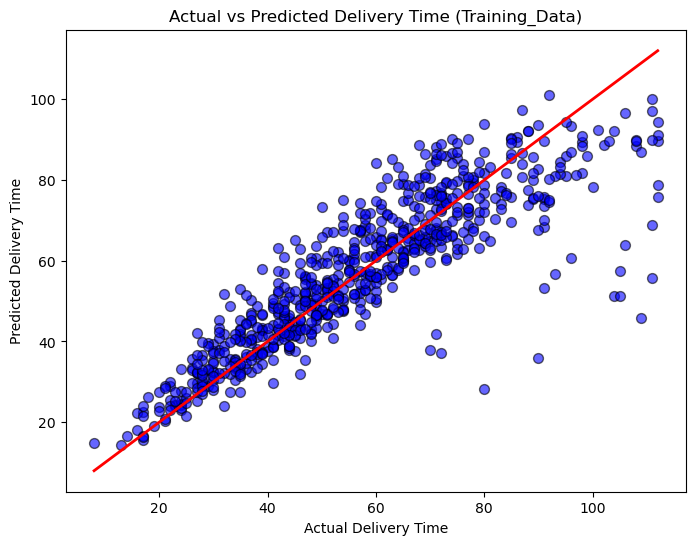

In [117]:
# for training dataset
y_pred_train=ols_model_train.predict(x_train)

mse= mean_squared_error(y_train, y_pred_train) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()


Target Variable Range:As target variable ( Delivery Time) ranges from 8 minutes to 153 minutes as per the dataset, we can calculate the percentage of error:

Maximum target value = 153 minutes
Minimum target value = 8 minutes
Range = 153 - 8 = 145 minutes
Now, let's calculate the percentage error for MAE:

Percentage error
=(7.2/145)×100
=4.97%

Interpretation:

An MAE of 7.2 minutes represents an error of about 5% of the target range. This suggests that model's predictions are, on average, off by around 5% of the actual delivery time.
In most practical scenarios, a 5% error is generally considered reasonable and can be acceptable, especially if the model's predictions meet the business requirements (e.g., customers being willing to accept a 5-minute deviation in delivery time).

In [118]:
# Step 1: Fit an initial OLS model to get the residuals and calculate weights for testing data
ols_model_test = sm.OLS(y_test, x_test).fit()

In [119]:
# Compute absolute residuals from the OLS fit on testing data
residuals_test = np.abs(ols_model_test.resid)

In [120]:
# Assign weights as the inverse of the absolute residuals (or use another method to calculate weights)
weights_test = 1 / residuals_test

In [121]:
# Replace infinite weights with a small value to avoid division by zero
weights_test = np.where(weights_test== np.inf, 1e10, weights_test)

In [122]:
# Step 2: Fit the WLS model using the weights from the testing data
wls_model_test = sm.WLS(y_test, x_test, weights=weights_test).fit()

In [123]:
# Print the WLS model summary
print("WLS Model Summary (Testing Data):")
print(wls_model_test.summary())

WLS Model Summary (Testing Data):
                            WLS Regression Results                            
Dep. Variable:      Delivery_Time_min   R-squared:                       0.976
Model:                            WLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     903.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.48e-223
Time:                        23:53:57   Log-Likelihood:                -935.63
No. Observations:                 300   AIC:                             1899.
Df Residuals:                     286   BIC:                             1951.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Mean Sqaured Error : 118.19784002602827
Root Mean Sqaured Error : 10.871883002775014
Mean Absolute Error : 7.541561134064753
R Squared Value : 0.7476164621999386
Adjusted R Squared Value : 0.7285515186970564


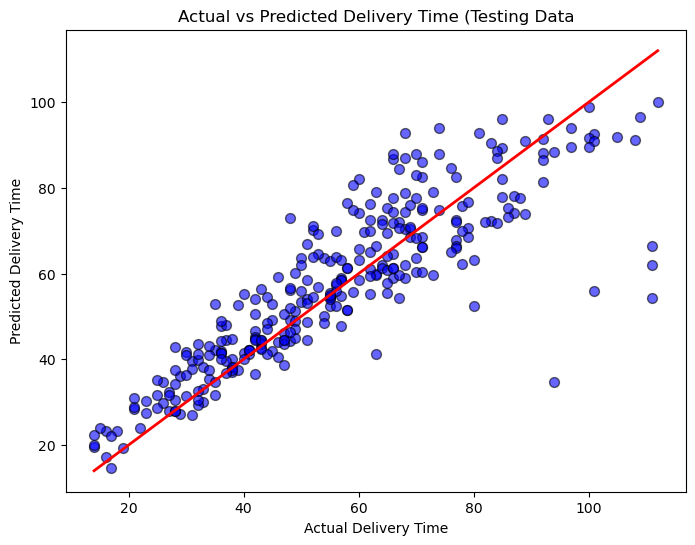

In [124]:
# for testing dataset
y_pred_test=ols_model_train.predict(x_test)

mse= mean_squared_error(y_test, y_pred_test) 
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred_test) 
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred_test) 
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1)) 
print("Adjusted R Squared Value :",adj_r2)

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

(array([ 14.,  52., 117.,  80.,  30.,   1.,   1.,   0.,   3.,   2.]),
 array([-24.91006331, -16.4943948 ,  -8.07872628,   0.33694223,
          8.75261074,  17.16827925,  25.58394777,  33.99961628,
         42.41528479,  50.83095331,  59.24662182]),
 <BarContainer object of 10 artists>)

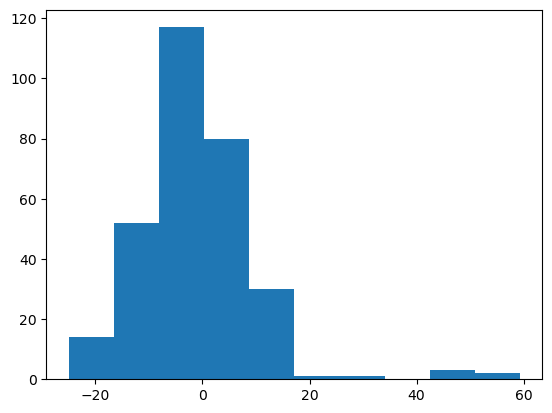

In [125]:
plt.hist(residual)   ## errors are normally distributed

## 2.SUPER VECTOR REGRESSION

In [126]:
from sklearn.svm import SVR

In [127]:
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train.ravel())  # Fit model to the training data

SVR()

Mean Squared Error (MSE): 233.28597354714967
RMSE:15.273702024956153
R-squared: 0.5018729673063758


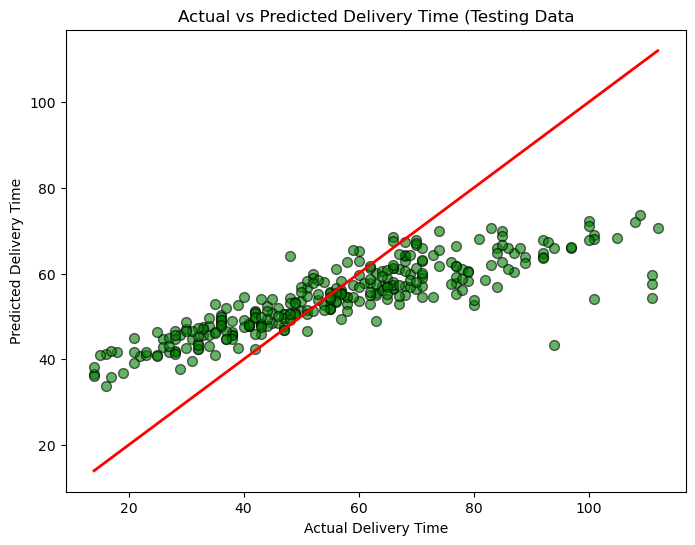

In [129]:
#for testing dataset
y_pred_test = svr.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE:{rmse}")
print(f"R-squared: {r2}")


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

Mean Squared Error (MSE): 233.41344625063314
RMSE:15.277874402240423
R-squared: 0.4969824062360815


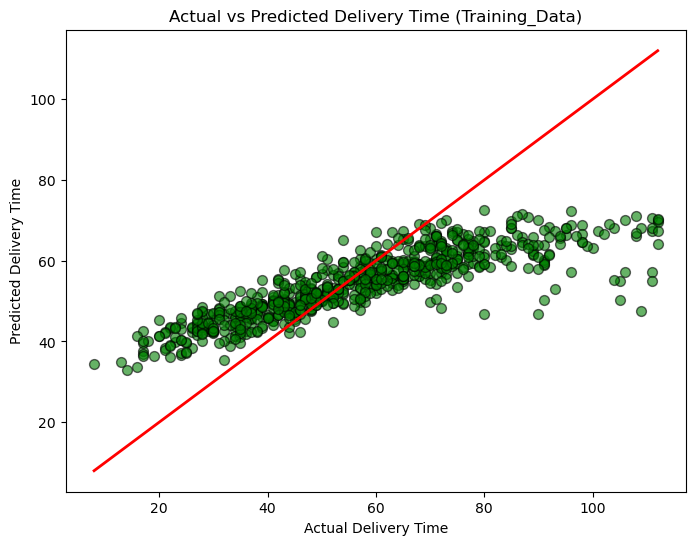

In [130]:
#for training data
y_pred_train = svr.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)  # Mean Squared Error

rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE:{rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],       #The C parameter (penalty parameter)       
    'epsilon': [0.1, 0.2, 0.5],    #The epsilon value (for the epsilon-insensitive loss function)
    'kernel': ['linear', 'rbf', 'poly']   
}

In [133]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [134]:
svr_gr = SVR(kernel='rbf')
svr_gr.fit(x_train, y_train.ravel())  # Fit model to the training data

SVR()

Mean Squared Error (MSE): 233.28597354714967
RMSE:15.273702024956153
R-squared: 0.5018729673063758


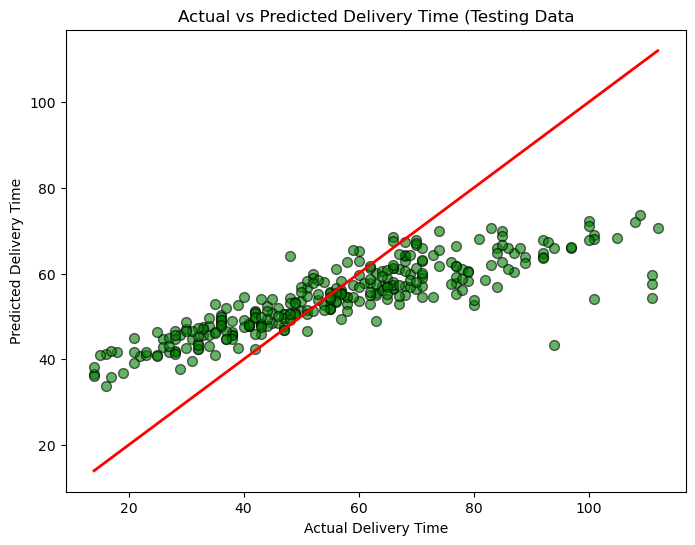

In [135]:
#for testing dataset
y_pred_test = svr_gr.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE:{rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

Mean Squared Error (MSE): 233.41344625063314
RMSE:15.277874402240423
R-squared: 0.4969824062360815


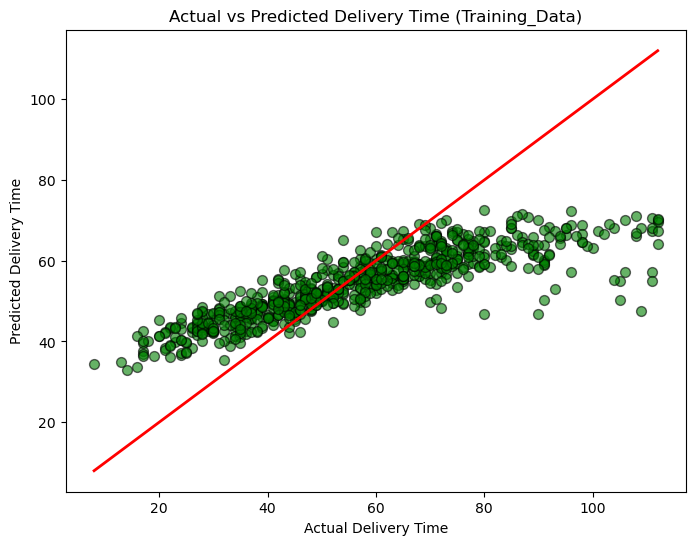

In [136]:
#for training data
y_pred_train = svr_gr.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)  # Mean Squared Error

rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE:{rmse}")
print(f"R-squared: {r2}")


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

In [137]:
# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 100, 'epsilon': 0.5, 'kernel': 'linear'}


In [138]:
# Train the SVM on scaled data
model = SVR(C=100, epsilon=0.5, kernel='linear')     #The C parameter (penalty parameter)  
model.fit(x_train, y_train)                           #The epsilon value (for the epsilon-insensitive loss function)

SVR(C=100, epsilon=0.5, kernel='linear')

Mean Squared Error (MSE): 112.85336960420372
RMSE:10.623246660235454
R-squared: 0.7590283150090157


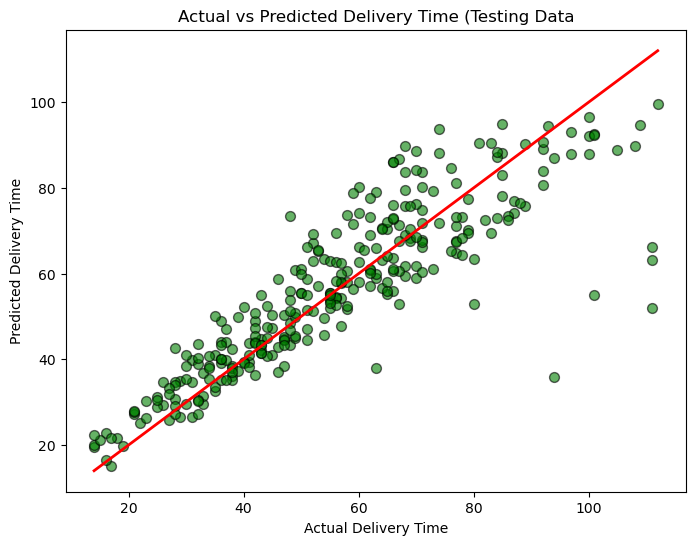

In [139]:
#for testing dataset
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE:{rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

Mean Squared Error (MSE): 115.31633609697786
RMSE:10.738544412394907
R-squared: 0.751487556364308


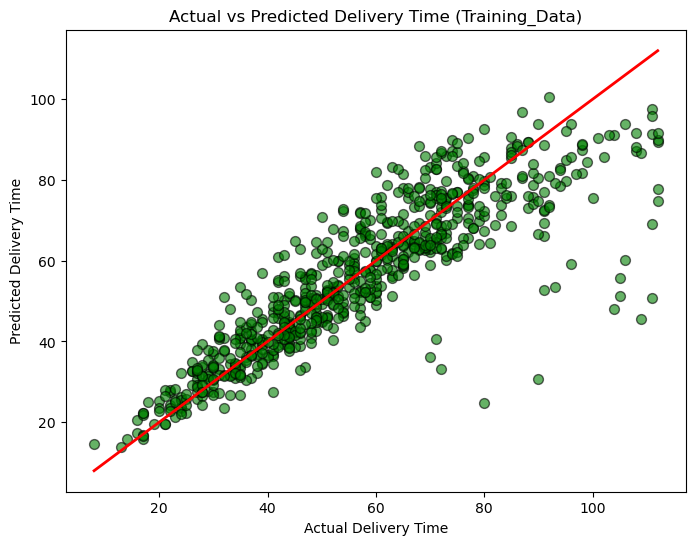

In [140]:
#for training data
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)  # Mean Squared Error

rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  # R-squared

print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE:{rmse}")
print(f"R-squared: {r2}")


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

## 3. DecisionTreeRegressor

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [142]:
dt_regressor = DecisionTreeRegressor(random_state=42)

In [143]:
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

Mean Squared Error (MSE): 277.92333333333335
Mean absolute Error (MAE):11.543333333333333
Root Mean Squared Error (RMSE): 16.671032761449823
R-squared: 0.40656044062728924


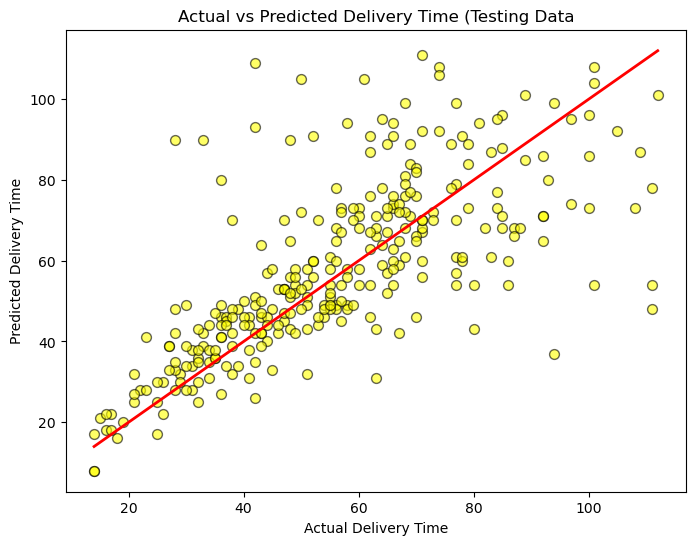

In [144]:
# testing dataset
y_pred_test = dt_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)# Mean Squared Error

mae=mean_absolute_error(y_test,y_pred_test) # Mean absolute  Error

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)  # R-squared score

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error (MAE):{mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='yellow', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

Mean Squared Error (MSE): 0.0
Mean absolute Error(MAE):0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0


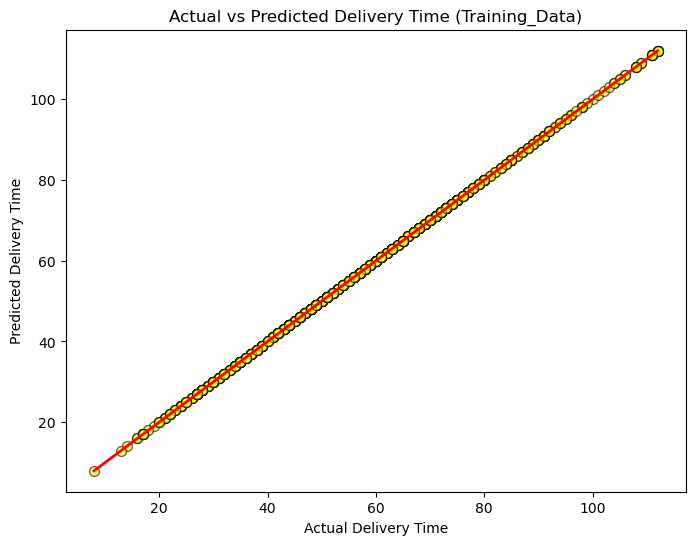

In [148]:
# training dataset
y_pred_train = dt_regressor.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)  # Mean Squared Error

mae=mean_absolute_error(y_train,y_pred_train) # Mean absolute  Error

rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  # R-squared score

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error(MAE):{mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='yellow', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

## can tune several hyperparameters of the DecisionTreeRegressor model to improve its performance:

max_depth: Limits the maximum depth of the tree. A deeper tree can model more complex relationships but might overfit.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
max_features: The number of features to consider when looking for the best split.

In [149]:
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10)

In [150]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4]}

In [151]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)

In [152]:
# Fit the grid search
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 10, 20]})

Mean Squared Error (MSE): 161.919619899881
mean absolute error (mae): 9.485572109498452
Root Mean Squared Error (RMSE): 12.724764041029642
R-squared: 0.6542589399216252


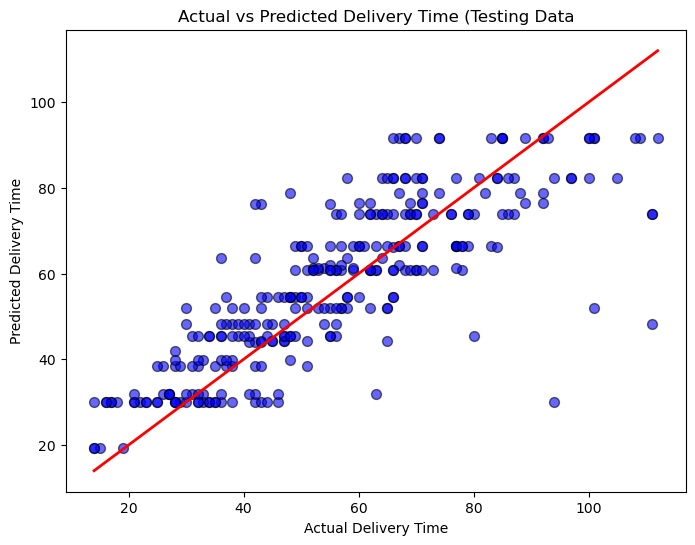

In [156]:
# testing dataset
y_pred_test = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error

mae= mean_absolute_error(y_test, y_pred_test) 

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)  # R-squared score

print(f"Mean Squared Error (MSE): {mse}")
print(f"mean absolute error (mae): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

Mean Squared Error (MSE): 110.22772307934942
mean absolute error (mae): 7.815418493285441
Root Mean Squared Error (RMSE): 10.498939140663184
R-squared: 0.7624537706798907


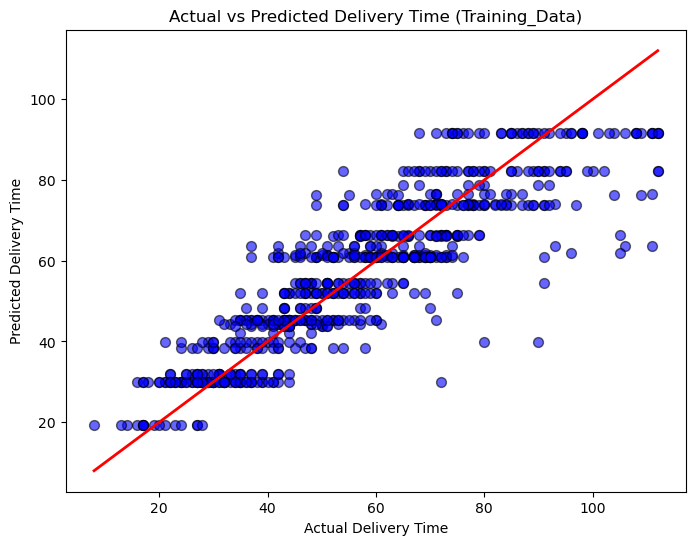

In [154]:
# training dataset
y_pred_train =grid_search.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)  # Mean Squared Error
mae=mean_absolute_error(y_train, y_pred_train)
rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  # R-squared score

print(f"Mean Squared Error (MSE): {mse}")
print(f"mean absolute error (mae): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

In [157]:
# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 20}


In [158]:
# Get the best model with tuned parameters
best_model = grid_search.best_estimator_

In [159]:
best_params = {
    'max_depth': 5,
    'min_samples_split': 20,
    'min_samples_leaf': 4}

In [160]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),best_params, cv=5)

FOR TRAINING DATASET :
Mean Squared Error (MSE): 110.22772307934942
Mean absolute Error (MSE): 7.815418493285441
Root Mean Squared Error (RMSE): 10.498939140663184
R-squared: 0.7624537706798907


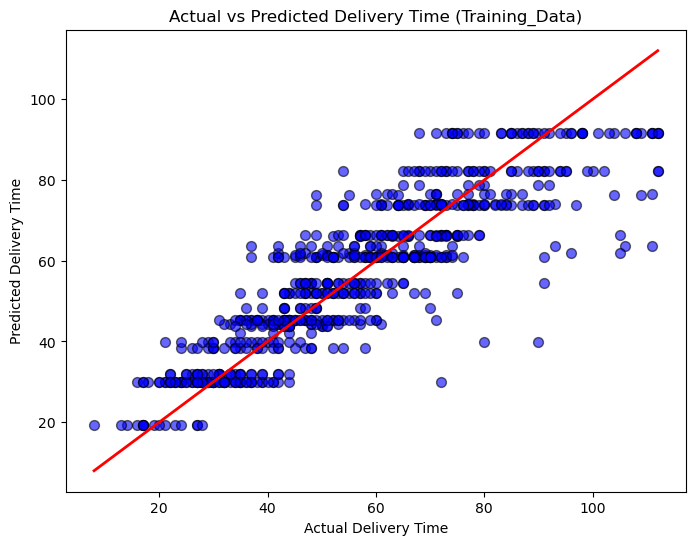

****************************************************************************************************
FOR TESTING DATASET :
Mean Squared Error (MSE): 161.919619899881
Mean absolute Error (MSE): 9.485572109498452
Root Mean Squared Error (RMSE): 12.724764041029642
R-squared: 0.6542589399216252


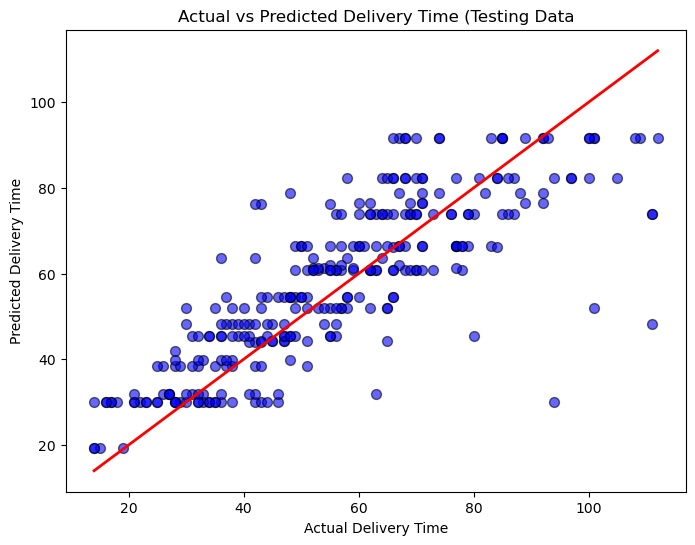

In [166]:
## Training dataset
y_pred_train = best_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train) # Mean Squared Error

mae=mean_absolute_error(y_train, y_pred_train)

rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  # R-squared score

print(f"FOR TRAINING DATASET :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error (MSE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

print("*"*100)
## Testing dataset
y_pred_test = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error

mae=mean_absolute_error(y_test, y_pred_test)

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)  # R-squared score

print(f"FOR TESTING DATASET :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error (MSE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

## 4. KNN REGRESSION

In [162]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [178]:
knn_regressor = KNeighborsRegressor(n_neighbors=80)

In [179]:
# Fit the model to the training data
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=80)

In [180]:
#  Make predictions on the testing set
y_pred_test = knn_regressor.predict(x_test)

FOR Testing Dataset :
Mean Squared Error (MSE): 319.17793697916665
Mean absolute Error (MSE): 14.266041666666666
Root Mean Squared Error (RMSE): 17.865551684153687
R-squared: 0.3184709897846858


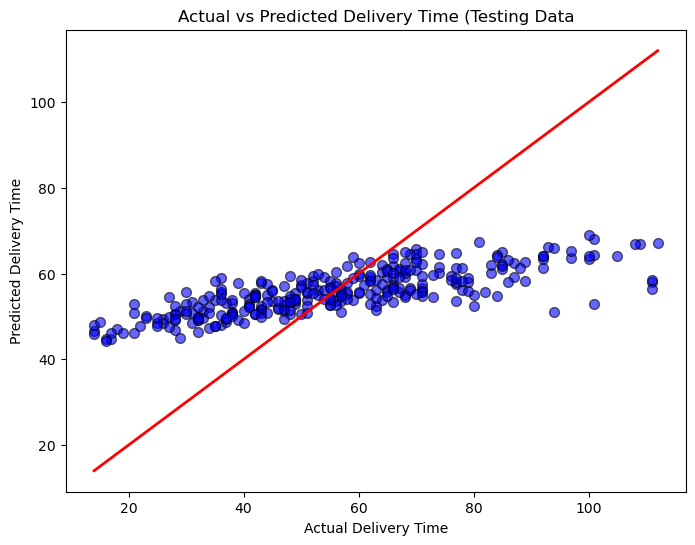

In [181]:
#  Evaluate the model's performance
# Testing dataset
mse = mean_squared_error(y_test, y_pred_test)

mae=mean_absolute_error(y_test, y_pred_test)

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)    

print(f"FOR Testing Dataset :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error (MSE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

FOR TRAINING DATASET :
Mean Squared Error (MSE): 313.6064337053572
Mean absolute Error (MSE): 14.179910714285715
Root Mean Squared Error (RMSE): 17.70893654924985
R-squared: 0.32416252702954695


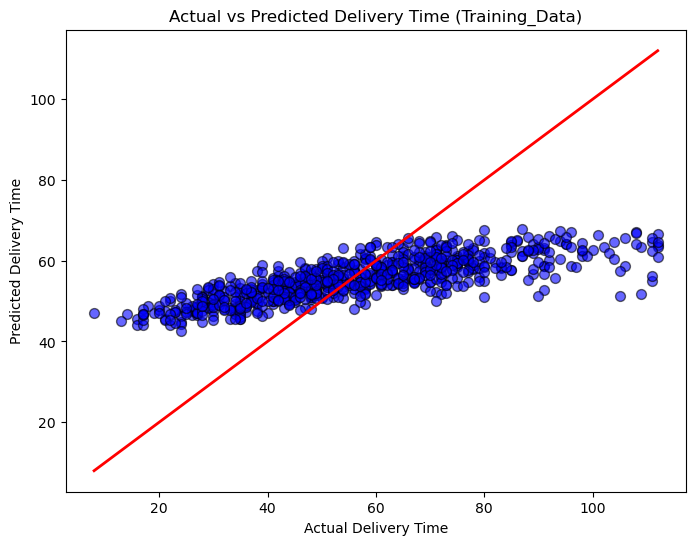

In [182]:
#  Make predictions on the training set
y_pred_train = knn_regressor.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train) 

mae=mean_absolute_error(y_train, y_pred_train)

rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  

print(f"FOR TRAINING DATASET :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error (MSE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

In [183]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(3, 21),  # Try values of k from 3 to 20
}

In [184]:
knn = KNeighborsRegressor(n_neighbors=100)

In [185]:
# Perform GridSearchCV to find the best value of k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=100),
             param_grid={'n_neighbors': range(3, 21)})

In [232]:
# Print the best value of k
print("Best k:", grid_search.best_params_['n_neighbors'])


Best k: 15


In [186]:
knn = KNeighborsRegressor(n_neighbors=15)

In [187]:
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

FOR Testing Dataset :
Mean Squared Error (MSE): 269.42745185185186
Mean absolute Error (MSE): 12.524666666666667
Root Mean Squared Error (RMSE): 16.41424539392085
R-squared: 0.4247013865578929


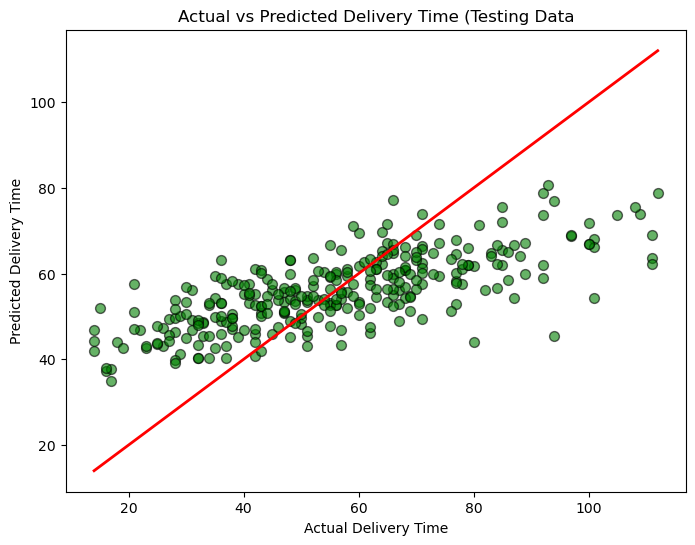

In [189]:
# Evaluate the model on the test set
y_pred_test = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)

mae=mean_absolute_error(y_train, y_pred_train)

rmse=np.sqrt(mse)

r2 = r2_score(y_test, y_pred_test)    

print(f"FOR Testing Dataset :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error (MSE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Testing Data')
plt.show()

FOR TRAINING DATASET :
Mean Squared Error (MSE): 246.4935174603175
Mean absolute Error (MSE): 12.524666666666667
Root Mean Squared Error (RMSE): 15.700112020629582
R-squared: 0.46879420177809483


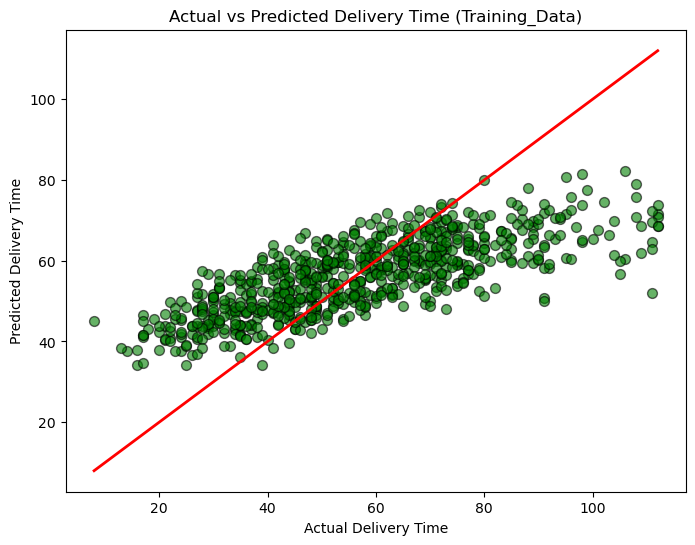

In [188]:
#  Make predictions on the training set
y_pred_train = grid_search.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train) 

mae=mean_absolute_error(y_train, y_pred_train)

rmse=np.sqrt(mse)

r2 = r2_score(y_train, y_pred_train)  

print(f"FOR TRAINING DATASET :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute Error (MSE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Training_Data)')
plt.show()

## Overall Conclusion:

#After fitting SVR model on food delivery time , obtained a 75% score for both the training and testing datasets  
it indicates Good Model Fit 
R-squared of 75% means that 75% of the variance in target variable (delivery time) is explained by the model. 
This suggests that SVR model is capturing the underlying patterns well.

#In practical terms, R2 value of 75% is generally considered good, especially in real-world datasets where noise and complexity are present. It indicates that the model is able to explain a significant portion of the variation in delivery time.

